In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('/content/healt_disease.csv')
print(df.shape)
print(df.info())


(270, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   edad            270 non-null    int64  
 1   sexo            270 non-null    int64  
 2   dolor_tora      270 non-null    int64  
 3   presion_art     270 non-null    int64  
 4   colest          270 non-null    int64  
 5   glucosa         270 non-null    int64  
 6   result_electro  270 non-null    int64  
 7   maxfreq_car     270 non-null    int64  
 8   exang           270 non-null    int64  
 9   oldpeak         270 non-null    float64
 10  slope           270 non-null    int64  
 11  ca              270 non-null    int64  
 12  thal            270 non-null    int64  
 13  target          270 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 29.7 KB
None


In [ ]:
# Resumen estadístico de variables numéricas

var_num=['edad', 'presion_art', 'colest', 'maxfreq_car', 'oldpeak']
summary_statistics = df[var_num].describe()

summary_statistics

,edad,presion_art,colest,maxfreq_car,oldpeak
count,270.000000,270.000000,270.000000,270.000000,270.00000
mean,54.433333,131.344444,249.659259,149.677778,1.05000
std,9.109067,17.861608,51.686237,23.165717,1.14521
min,29.000000,94.000000,126.000000,71.000000,0.00000
25%,48.000000,120.000000,213.000000,133.000000,0.00000
50%,55.000000,130.000000,245.000000,153.500000,0.80000
75%,61.000000,140.000000,280.000000,166.000000,1.60000
max,77.000000,200.000000,564.000000,202.000000,6.20000


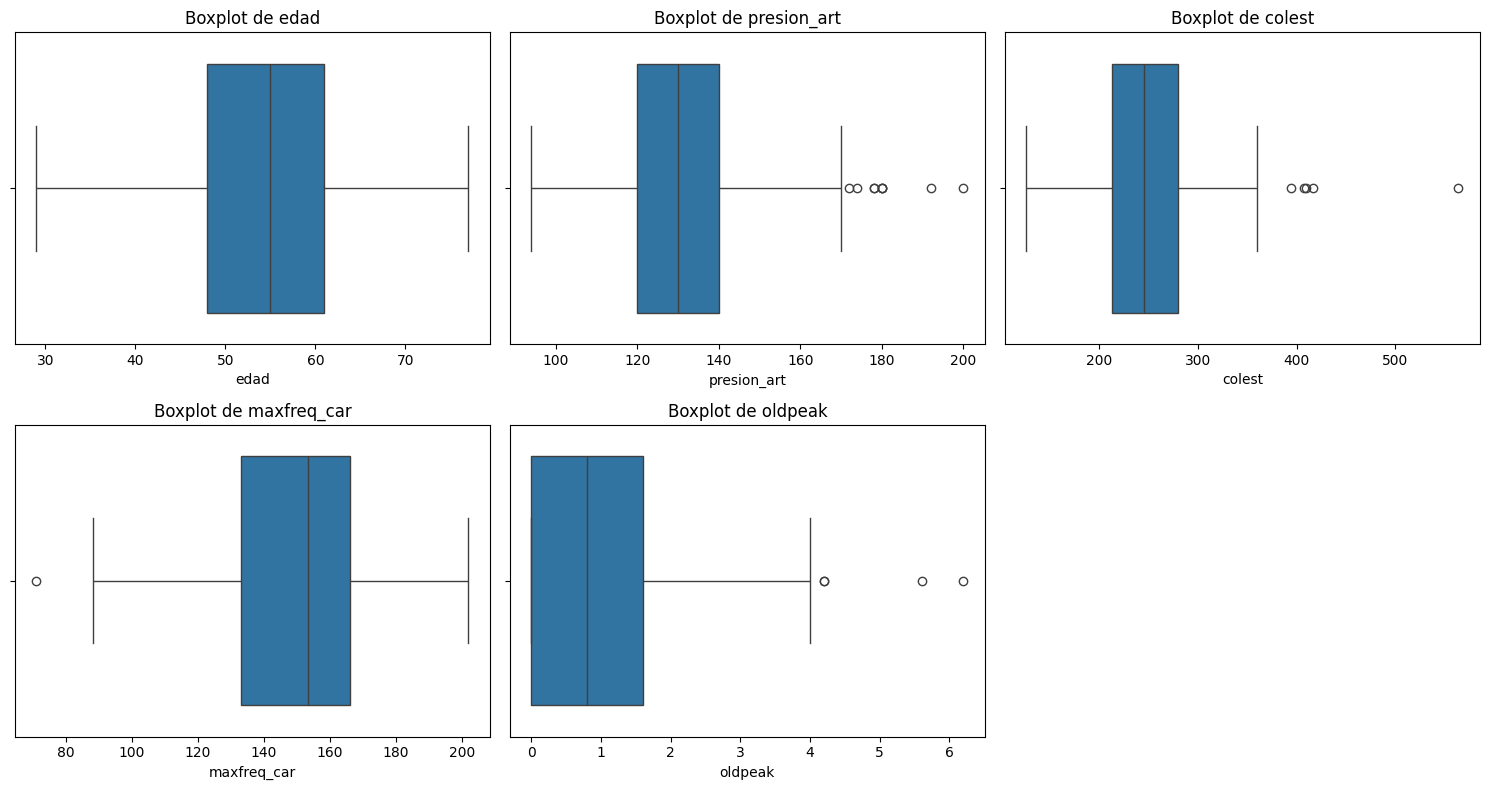

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
try:
    df = pd.read_csv("/content/healt_disease.csv")
except FileNotFoundError:
    print("Error: No se encontró el archivo CSV. Verifica la ruta del archivo.")
    exit()

# Seleccionar columnas numéricas existentes en df
var_num = [col for col in ['edad', 'presion_art', 'colest', 'maxfreq_car', 'oldpeak'] if col in df.columns]

# Definir número de filas dinámicamente según la cantidad de gráficos
num_plots = len(var_num)
rows = (num_plots // 3) + (1 if num_plots % 3 else 0)

# Configuración de la figura
fig, axes = plt.subplots(nrows=rows, ncols=3, figsize=(15, rows * 4))
axes = axes.flatten() if num_plots > 1 else [axes]

# Graficar boxplots para cada variable numérica
for i, col in enumerate(var_num):
    sns.boxplot(x=df[col].dropna(), ax=axes[i])  # Eliminar valores NaN
    axes[i].set_title(f"Boxplot de {col}")

# Eliminar ejes vacíos si hay menos gráficos que espacios asignados
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustar layout
plt.tight_layout()
plt.show()


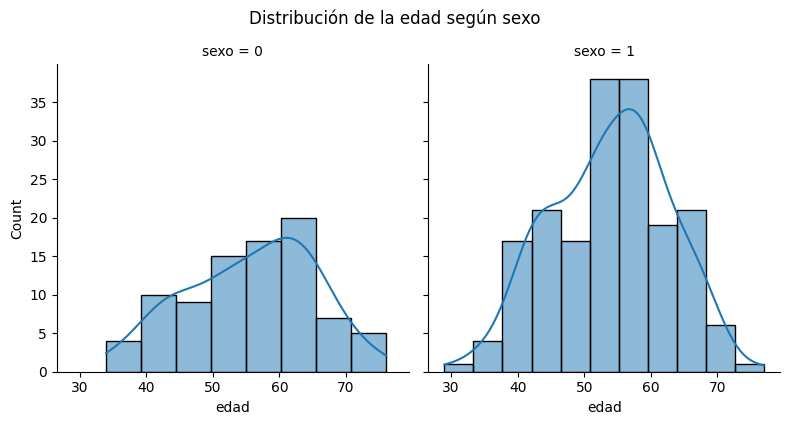

In [ ]:
g = sns.FacetGrid(df, col='sexo', height=4, aspect=1)
g.map(sns.histplot, 'edad', kde=True)
plt.suptitle('Distribución de la edad según sexo', y=1.05)
plt.show()

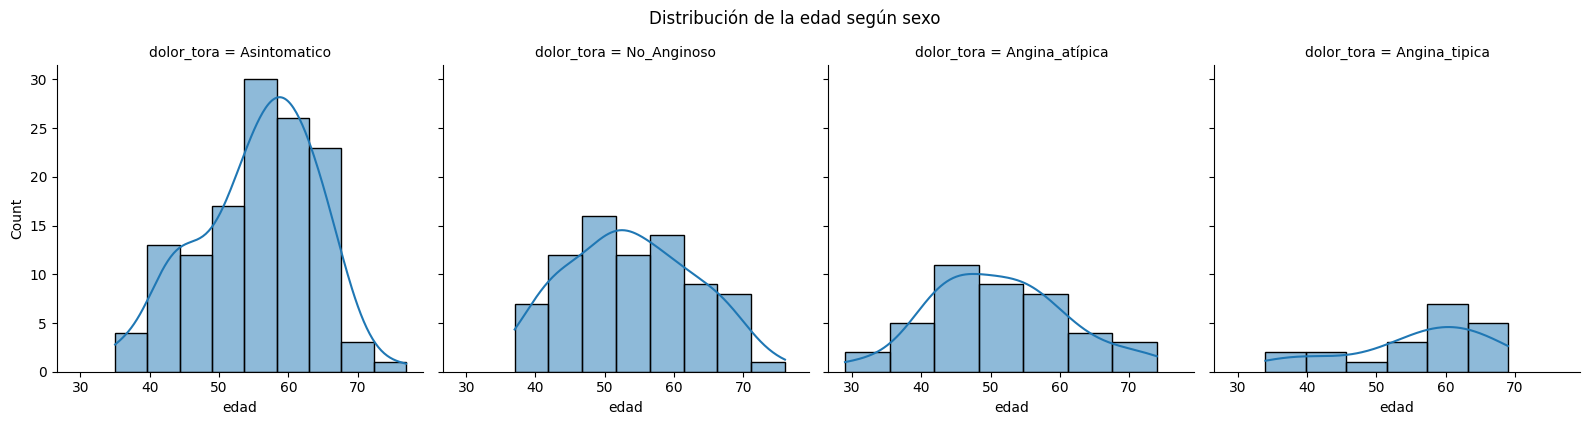

In [ ]:
df['dolor_tora'] = df['dolor_tora'].replace({0: 'Angina_tipica',
                                             1: 'Angina_atípica',
                                             2: 'No_Anginoso',
                                             3: 'Asintomatico'})

g = sns.FacetGrid(df, col='dolor_tora', height=4, aspect=1)
g.map(sns.histplot, 'edad', kde=True)
plt.suptitle('Distribución de la edad según sexo', y=1.05)
plt.show()


dolor_tora      glucosa
Angina_atípica  0           37
                1            5
Angina_tipica   0           15
                1            5
Asintomatico    0          116
                1           13
No_Anginoso     0           62
                1           17
Name: glucosa, dtype: int64


/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


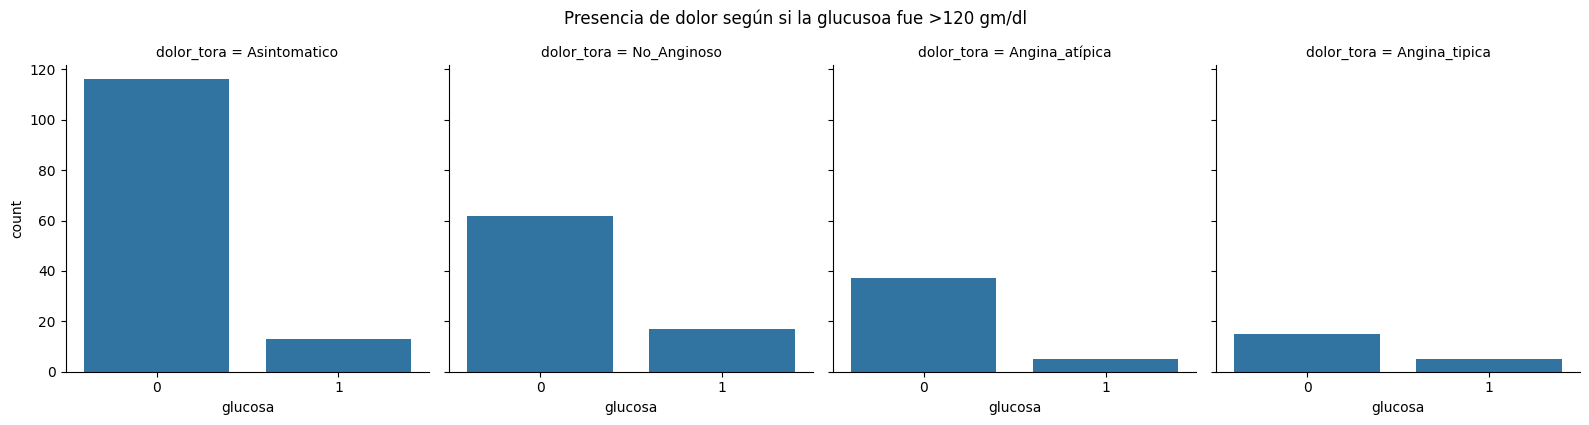

In [ ]:
print(df.groupby(['dolor_tora','glucosa'])['glucosa'].count())
g = sns.FacetGrid(df, col='dolor_tora', height=4, aspect=1)
g.map(sns.countplot, 'glucosa',)

plt.suptitle('Presencia de dolor según si la glucusoa fue >120 gm/dl', y=1.05)
plt.show()

glucosa
0    249.117391
1    252.775000
Name: colest, dtype: float64


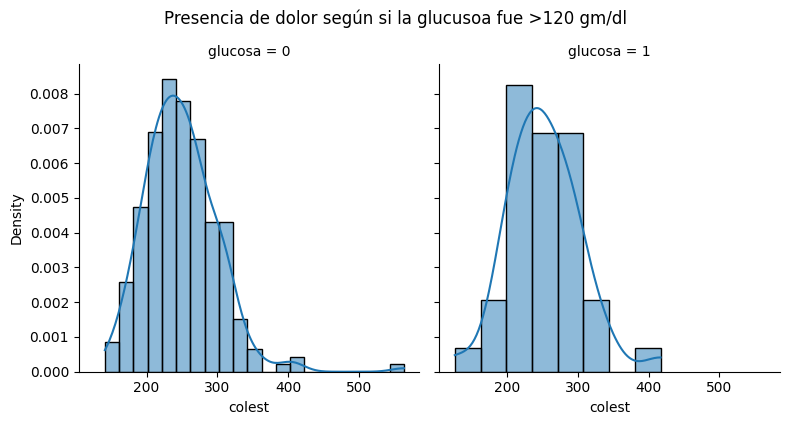

In [ ]:
print(df.groupby(['glucosa'])['colest'].mean())
g = sns.FacetGrid(df, col='glucosa', height=4, aspect=1)
g.map(sns.histplot, 'colest', kde=True,  stat = "density")
plt.suptitle('Presencia de dolor según si la glucusoa fue >120 gm/dl', y=1.05)
plt.show()

slope
0    0.400000
1    1.489344
2    2.766667
Name: oldpeak, dtype: float64


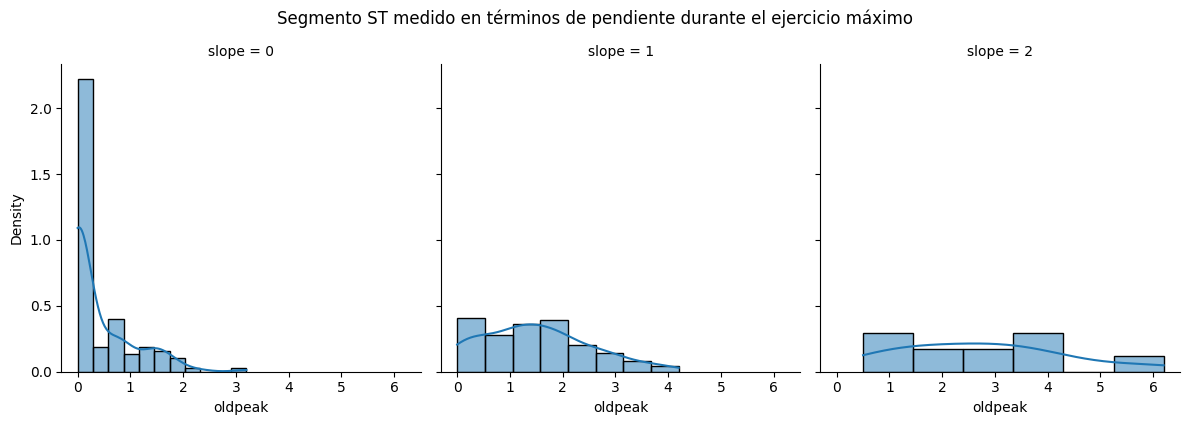

In [ ]:
print(df.groupby(['slope'])['oldpeak'].mean())
g = sns.FacetGrid(df, col='slope', height=4, aspect=1)
g.map(sns.histplot, 'oldpeak', kde=True,  stat = "density")
plt.suptitle('Segmento ST medido en términos de pendiente durante el ejercicio máximo', y=1.05)
plt.show()

dolor_tora
Angina_atípica    161.547619
Angina_tipica     156.900000
Asintomatico      141.201550
No_Anginoso       155.379747
Name: maxfreq_car, dtype: float64


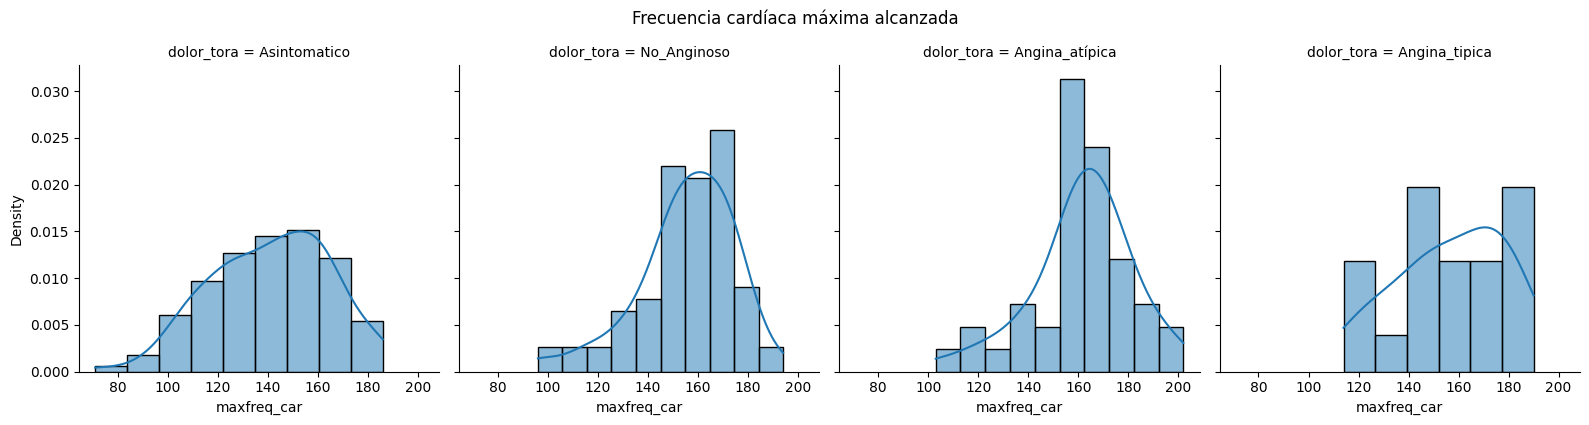

In [ ]:
print(df.groupby(['dolor_tora'])['maxfreq_car'].mean())
g = sns.FacetGrid(df, col='dolor_tora', height=4, aspect=1)
g.map(sns.histplot, 'maxfreq_car', kde=True, stat = "density")
plt.suptitle('Frecuencia cardíaca máxima alcanzada', y=1.05)
plt.show()

exang
0    130.309392
1    133.449438
Name: presion_art, dtype: float64


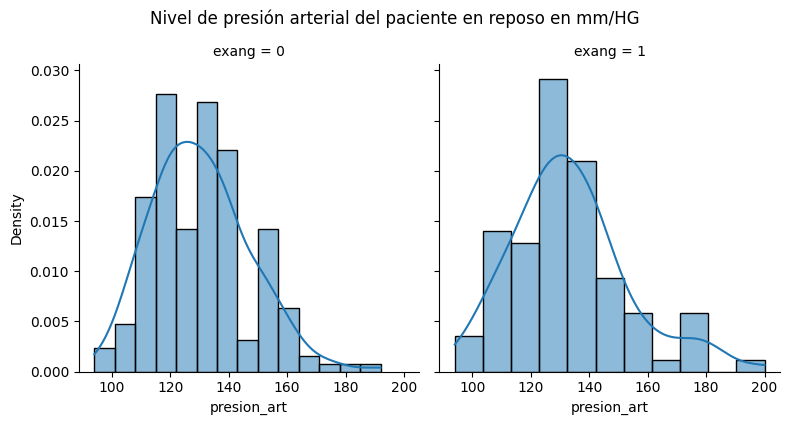

In [ ]:
print(df.groupby(['exang'])['presion_art'].mean())
g = sns.FacetGrid(df, col='exang', height=4, aspect=1)
g.map(sns.histplot, 'presion_art', kde=True, stat = "density")
plt.suptitle('Nivel de presión arterial del paciente en reposo en mm/HG', y=1.05)
plt.show()

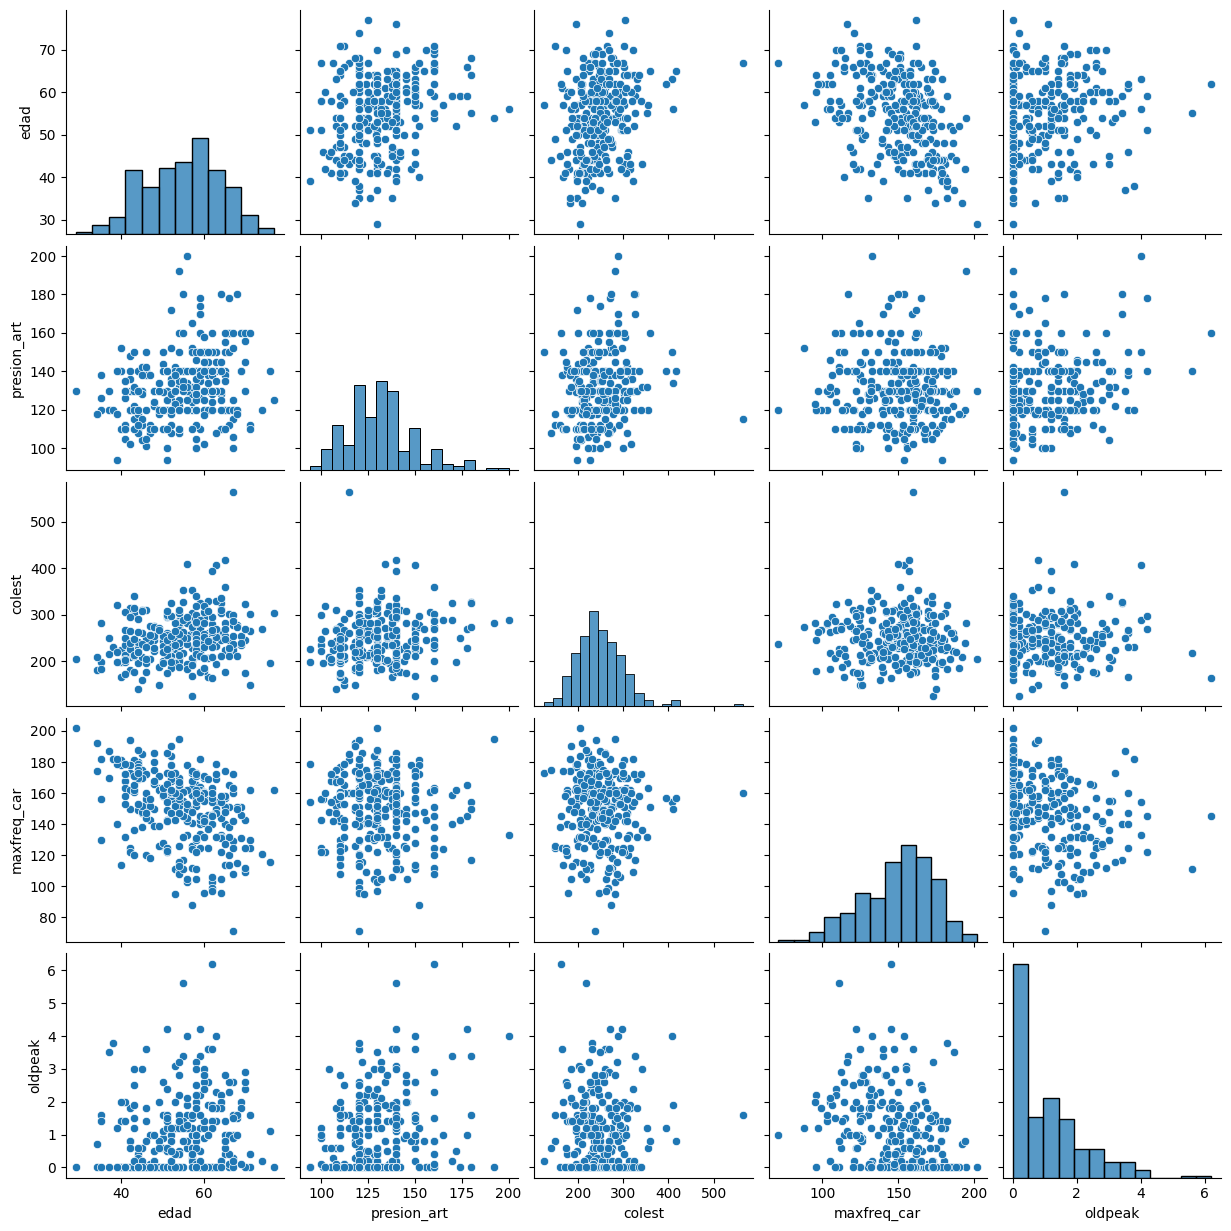

In [ ]:
var_num=['edad', 'presion_art', 'colest', 'maxfreq_car', 'oldpeak']
sns.pairplot(df[var_num])
plt.show()


Covariance Matrix
                   edad  presion_art       colest  maxfreq_car   oldpeak
edad          82.975093    44.426394   103.605452   -84.874721  2.026208
presion_art   44.426394   319.037051   159.731185   -16.193432  4.557435
colest       103.605452   159.731185  2671.467107   -22.437340  1.640149
maxfreq_car  -84.874721   -16.193432   -22.437340   536.650434 -9.260037
oldpeak        2.026208     4.557435     1.640149    -9.260037  1.311506

Correlation Matrix
                 edad  presion_art    colest  maxfreq_car   oldpeak
edad         1.000000     0.273053  0.220056    -0.402215  0.194234
presion_art  0.273053     1.000000  0.173019    -0.039136  0.222800
colest       0.220056     0.173019  1.000000    -0.018739  0.027709
maxfreq_car -0.402215    -0.039136 -0.018739     1.000000 -0.349045
oldpeak      0.194234     0.222800  0.027709    -0.349045  1.000000

Mapa de calor de las correlaciones


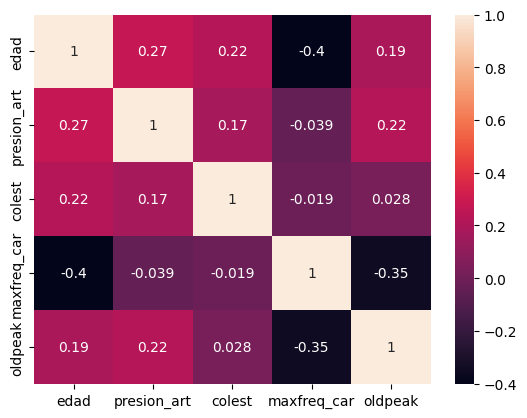

In [ ]:
print('\nCovariance Matrix')
print(df[var_num].cov())
print('\nCorrelation Matrix')
print(df[var_num].corr())

print('\nMapa de calor de las correlaciones')
sns.heatmap(df[var_num].corr(), annot=True)
plt.show()

In [ ]:
X=df.drop(columns=['target'])
y=df['target']

print(df.columns)
display(df.head())

Index(['edad', 'sexo', 'dolor_tora', 'presion_art', 'colest', 'glucosa',
       'result_electro', 'maxfreq_car', 'exang', 'oldpeak', 'slope', 'ca',
       'thal', 'target'],
      dtype='object')


,edad,sexo,dolor_tora,presion_art,colest,glucosa,result_electro,maxfreq_car,exang,oldpeak,slope,ca,thal,target
0,70,1,Asintomatico,130,322,0,2,109,0,2.4,1,3,1,1
1,67,0,No_Anginoso,115,564,0,2,160,0,1.6,1,0,3,0
2,57,1,Angina_atípica,124,261,0,0,141,0,0.3,0,0,3,1
3,64,1,Asintomatico,128,263,0,0,105,1,0.2,1,1,3,0
4,74,0,Angina_atípica,120,269,0,2,121,1,0.2,0,1,1,0


In [ ]:
# Separamos las variables que ya estan desscritas numericamente ya sea que representen cantidad o codficación
var_codificadas =['sexo', 'glucosa', 'result_electro', 'exang', 'slope', 'ca', 'thal']

# Separamos las variables que sean categoricas en este caso parece ser un caso de una varibale ordinal dada la naturaleza de dolor_tora
var_ord=['dolor_tora']
print(var_num)
print(var_ord)

['edad', 'presion_art', 'colest', 'maxfreq_car', 'oldpeak']
['dolor_tora']


Una vez separadas las variables debemos realizar la estandarización para las variables numericas y la codficicacion para las categoricas ente caso solo dolor_tora.

In [ ]:
# Importamos las librerias
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

numerical_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer([
    ('numerical', numerical_pipeline, var_num)
])

# Unimos la las columnas procesadas
dolor_tora = pd.DataFrame(LabelEncoder().fit_transform(X['dolor_tora']), columns=['dolor_tora'])
X_df = pd.DataFrame(preprocessor.fit_transform(X) , columns=preprocessor.get_feature_names_out()).merge(dolor_tora, left_index=True, right_index=True).merge(X[var_codificadas], left_index=True, right_index=True)
X_df.head()

,numerical__edad,numerical__presion_art,numerical__colest,numerical__maxfreq_car,numerical__oldpeak,dolor_tora,sexo,glucosa,result_electro,exang,slope,ca,thal
0,1.712094,-0.075410,1.402212,-1.759208,1.181012,2,1,0,2,0,1,3,1
1,1.382140,-0.916759,6.093004,0.446409,0.481153,3,0,0,2,0,1,0,3
2,0.282294,-0.411950,0.219823,-0.375291,-0.656118,0,1,0,0,0,0,0,3
3,1.052186,-0.187590,0.258589,-1.932198,-0.743600,2,1,0,0,1,1,1,3
4,2.152032,-0.636310,0.374890,-1.240239,-0.743600,0,0,0,2,1,0,1,1


In [ ]:
RESULTADOS = {}

### **-> K vecinos más cercanos**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

KNN = KNeighborsClassifier()
cv_knn = cross_val_score(KNN, X_df, y, cv=5, scoring='recall').mean()
RESULTADOS['KNN'] = cv_knn
print(cv_knn)

0.775


### **-> Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()
cv_RF = cross_val_score(RF, X_df, y, cv=5, scoring='recall').mean()
RESULTADOS['RandomForest'] = cv_RF
print(cv_RF)

0.75


In [ ]:
from sklearn.svm import SVC

SVM = SVC()
cv_svm = cross_val_score(SVM, X_df, y, cv=5, scoring='recall').mean()
RESULTADOS['SVM'] = cv_svm
print(cv_svm)

0.7916666666666667


### **-> Regresión Logistica**

In [ ]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
cv_logReg = cross_val_score(LR, X_df, y, cv=5, scoring='recall').mean()
RESULTADOS['LogisticRegression'] = cv_logReg
print(cv_logReg)


0.7916666666666667


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

cv_GradientBoost=cross_val_score(GradientBoostingClassifier(n_estimators=100 ), X_df, y, cv=10, scoring='recall').mean()
RESULTADOS['GradientBoost'] = cv_GradientBoost
print(cv_GradientBoost)

0.7333333333333334


In [ ]:
from xgboost import XGBClassifier

XGB_model = XGBClassifier(n_estimators=100)
RESULTADOS['XGB'] = cross_val_score(XGB_model, X_df, y, cv=10, scoring='recall').mean()
print(RESULTADOS['XGB'])

0.8


In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Changed StackingRegressor to StackingClassifier
estimador_stacking = StackingClassifier(
    estimators=[
        ('LogR',LogisticRegression()),
        ('RF',RandomForestClassifier(n_estimators=100)),
        ('KN',KNeighborsClassifier()),
        ('SVC',SVC())], # Ensure SVC is initialized as a classifier
    final_estimator=SVC())

# Use y_array for cross_val_score
# Assuming rmse_cv is defined elsewhere and works with 1D arrays
cv_Stacking1 = cross_val_score(estimador_stacking, X_df, y, scoring='recall', cv=10).mean()
RESULTADOS['Stacking1'] = cv_Stacking1
print(cv_Stacking1)

0.7833333333333333


In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC  # Corrected import
from xgboost import XGBClassifier

# Changed StackingRegressor to StackingClassifier
estimador_stacking = StackingClassifier(
    estimators=[
        ('LogR',LogisticRegression()),
        ('RF',RandomForestClassifier(n_estimators=100)),
        ('XGB_LR',XGBClassifier(estimator=LogisticRegression)),
        ('XGB_SVM',XGBClassifier(estimator=SVC()))], # Ensure SVC is initialized as a classifier
    final_estimator=SVC())

# Use y_array for cross_val_score
# Assuming rmse_cv is defined elsewhere and works with 1D arrays
cv_Stacking2 = cross_val_score(estimador_stacking, X_df, y, scoring='recall', cv=10).mean()
RESULTADOS['Stacking2'] = cv_Stacking2
print(cv_Stacking2)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:08:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "estimator" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:08:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "estimator" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:08:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "estimator" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:08:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "estimator" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:08:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "estimator" } are not used.

  warnings.warn

0.7583333333333333


Por último se presentan de mayor a menor las puntuaciones recall de cada modelo antes programados

In [ ]:
display(pd.DataFrame(RESULTADOS, index=['Recall']).T.sort_values('Recall', ascending=False))

,Recall
XGB,0.800000
LogisticRegression,0.791667
SVM,0.791667
Stacking1,0.783333
KNN,0.775000
Stacking2,0.758333
RandomForest,0.750000
GradientBoost,0.733333
Extratree_100,NaN


In [ ]:
RESULTADOS_SVM = {}
RESULTADOS_SVM['sigmoid']=cross_val_score(SVC( kernel='sigmoid'), X_df, y, cv=10, scoring='recall').mean()
RESULTADOS_SVM['poly']=cross_val_score(SVC( kernel='poly'), X_df, y, cv=10, scoring='recall').mean()
RESULTADOS_SVM['linear']=cross_val_score(SVC( kernel='linear'), X_df, y, cv=10, scoring='recall').mean()
RESULTADOS_SVM['rbf']=cross_val_score(SVC( kernel='rbf'), X_df, y, cv=10, scoring='recall').mean()

display(pd.DataFrame(RESULTADOS_SVM, index=['Recall']).T.sort_values('Recall', ascending=False))

,Recall
sigmoid,0.866667
linear,0.800000
rbf,0.800000
poly,0.741667
